##  Linear Regression Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the dataset
df = pd.read_csv('housing.csv')

#Display first few rows of the dataset
df.head()

,longitude,latitude,HouseAge,total_rooms,total_bedrooms,population,households,MedInc,price
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


## Exploratory Data Analysis

In [5]:
# Display basic info
df.info()

#Summary statistics of dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   longitude       20640 non-null  float64
 1   latitude        20640 non-null  float64
 2   HouseAge        20640 non-null  int64  
 3   total_rooms     20640 non-null  int64  
 4   total_bedrooms  20433 non-null  float64
 5   population      20640 non-null  int64  
 6   households      20640 non-null  int64  
 7   MedInc          20640 non-null  float64
 8   price           20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


,longitude,latitude,HouseAge,total_rooms,total_bedrooms,population,households,MedInc,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


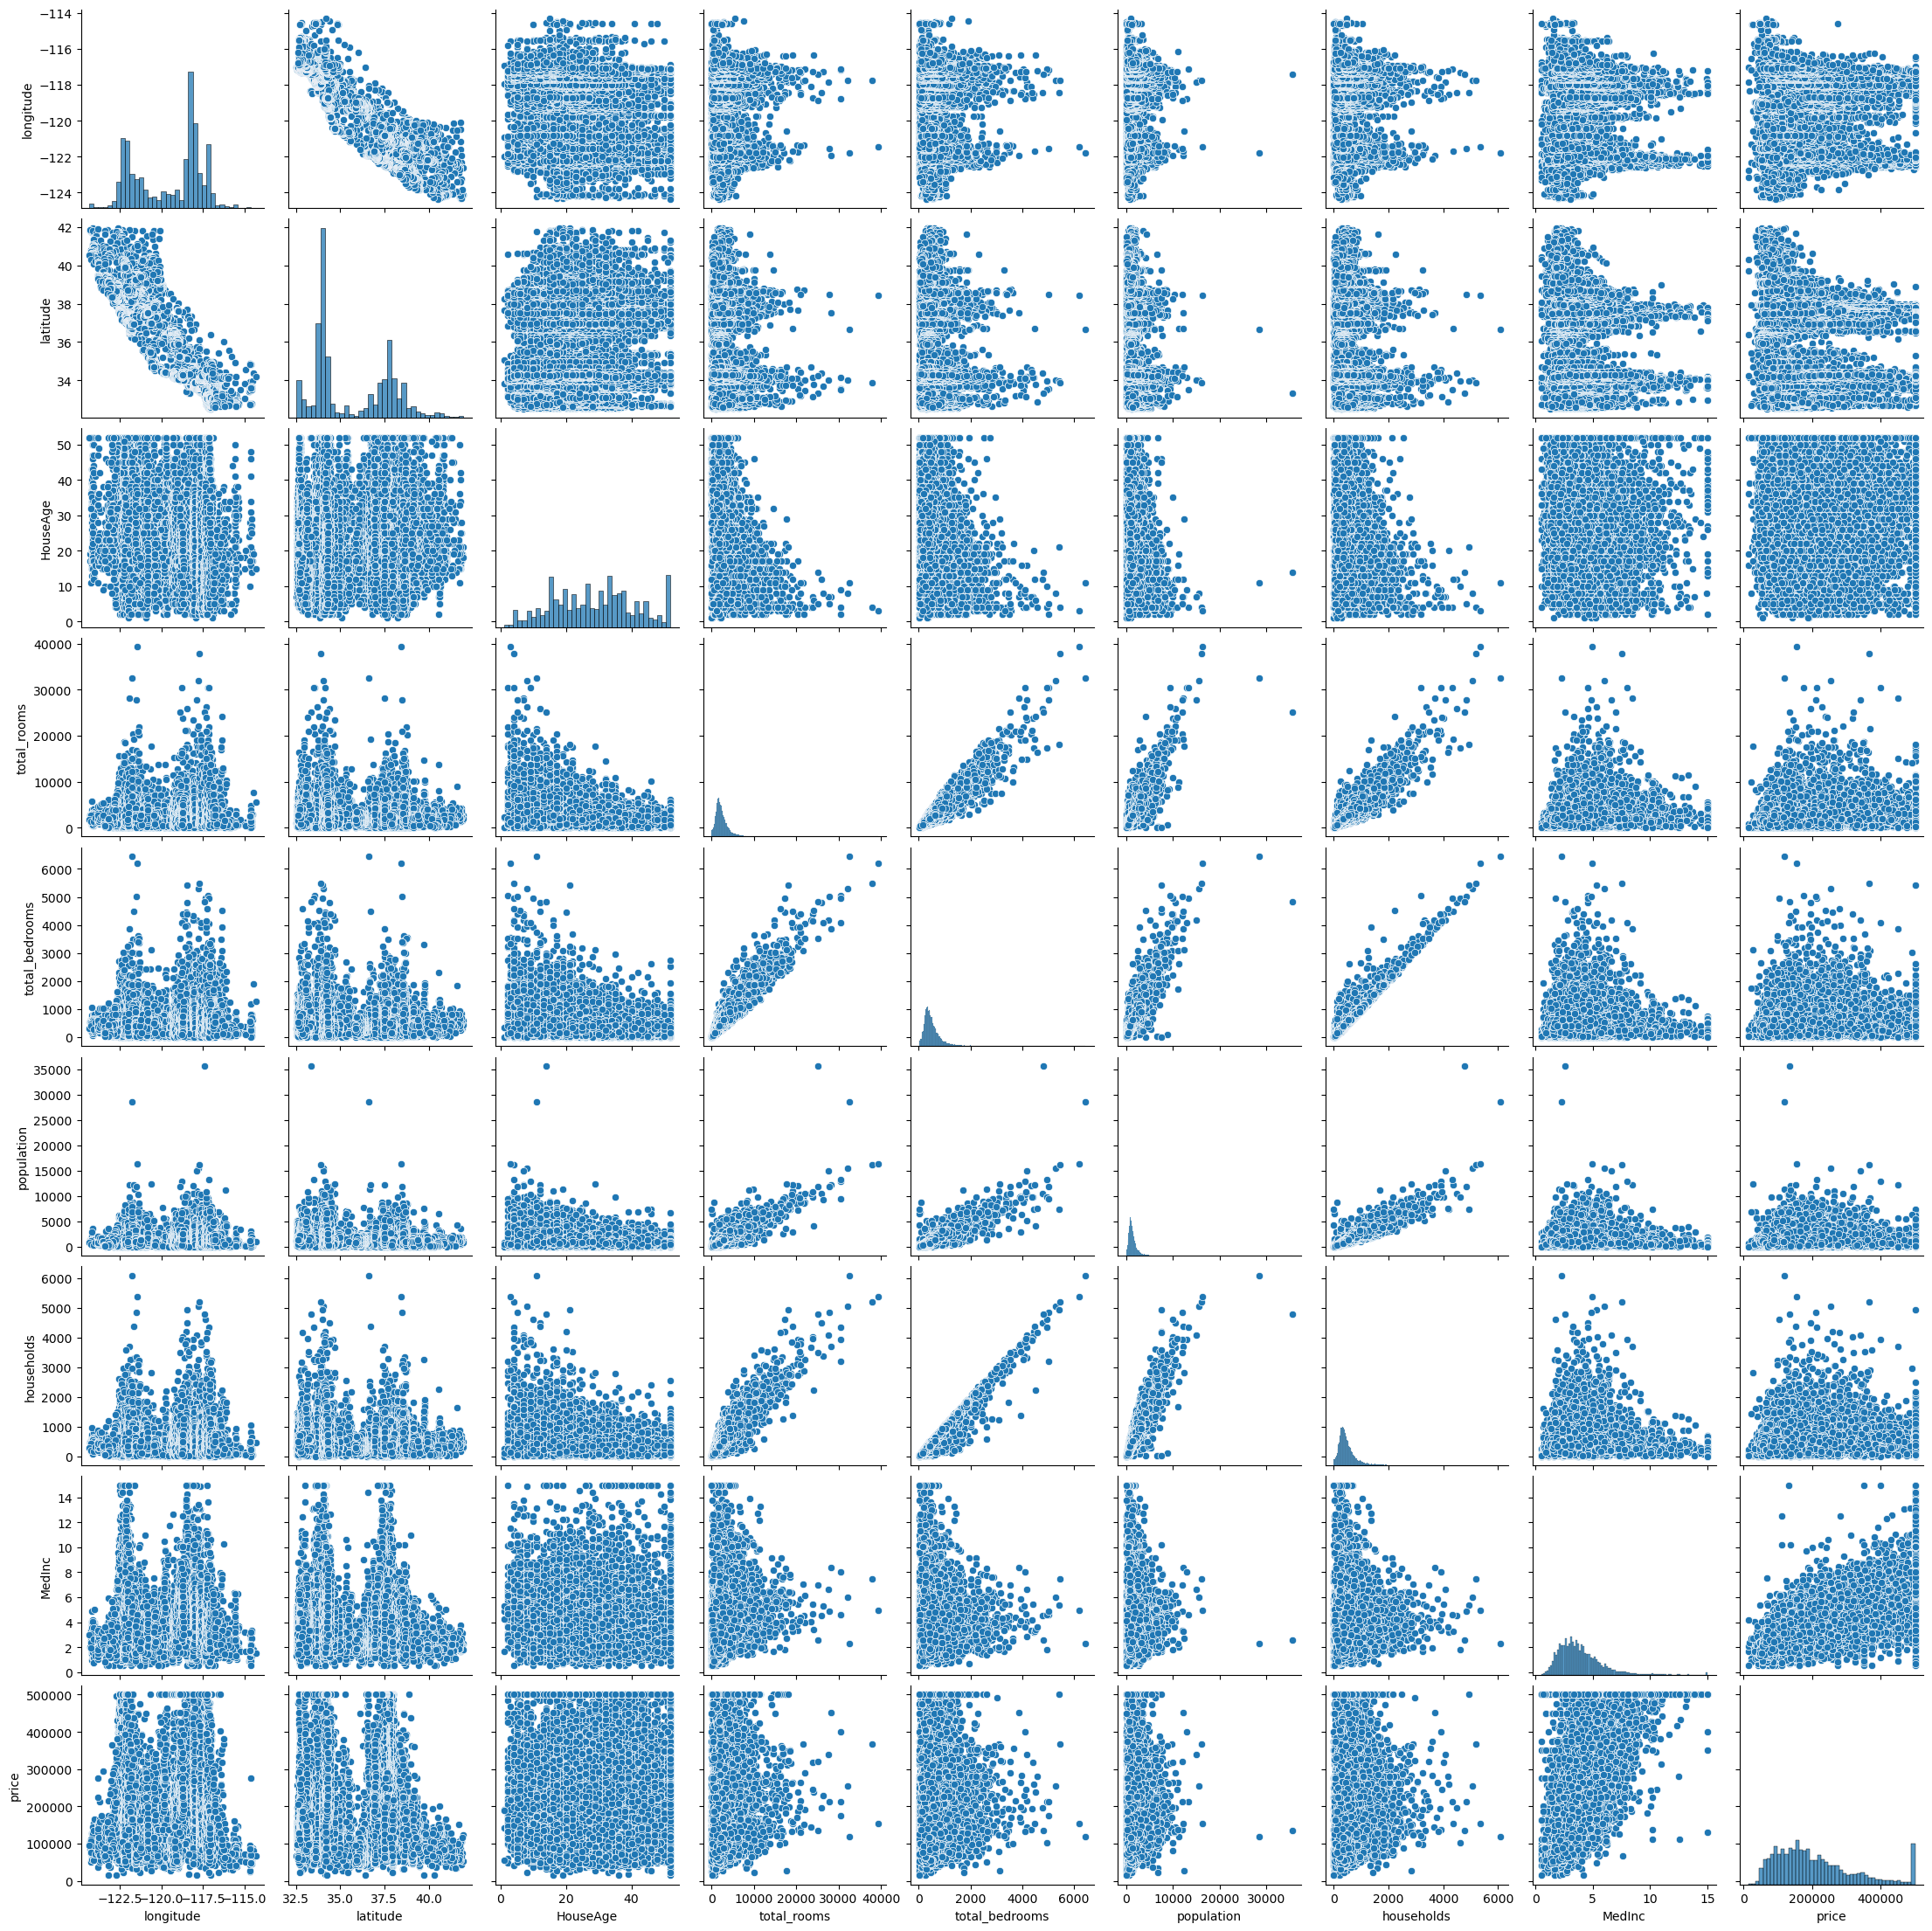

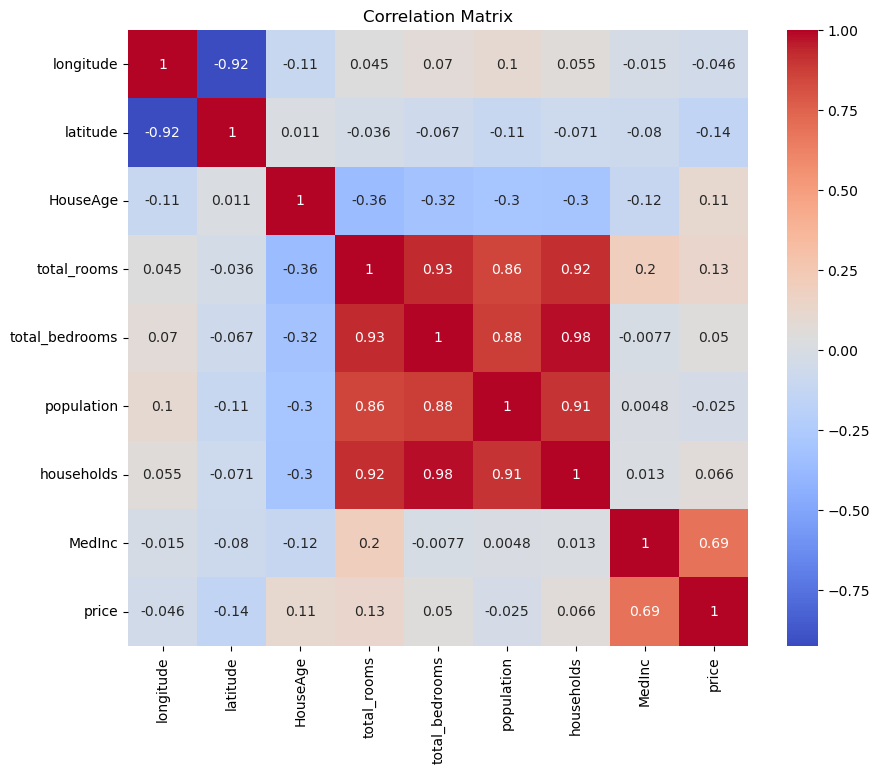

In [6]:
# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

#Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

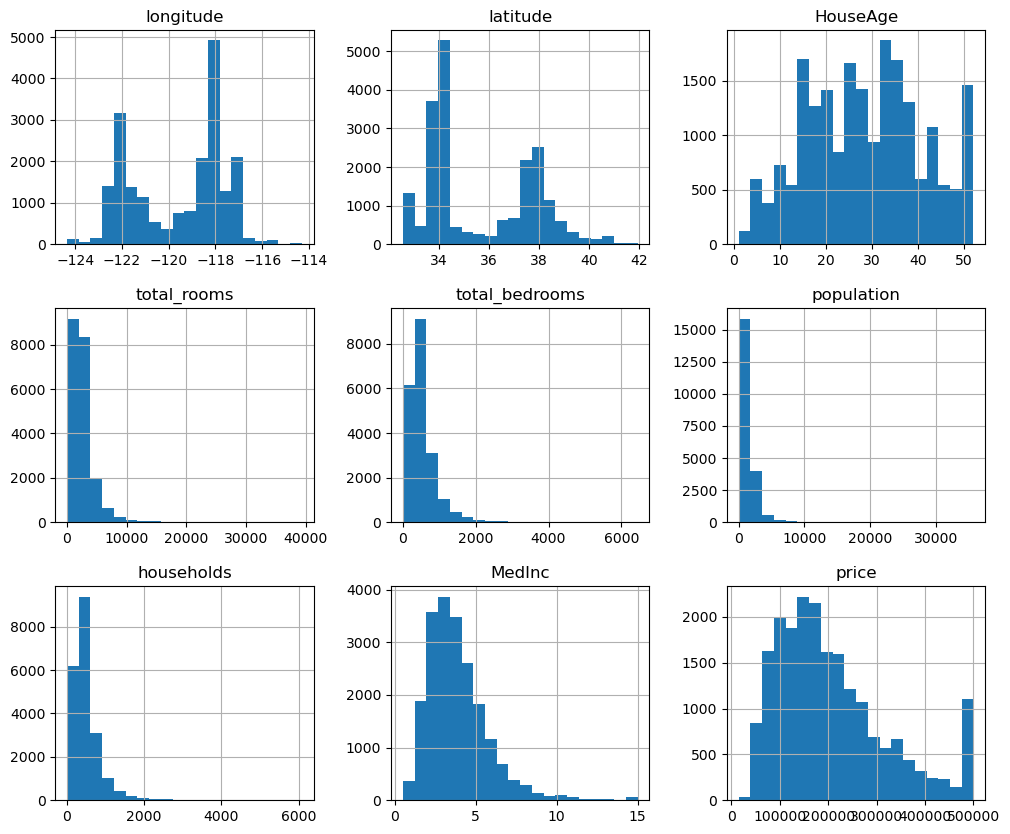

<function matplotlib.pyplot.show(close=None, block=None)>

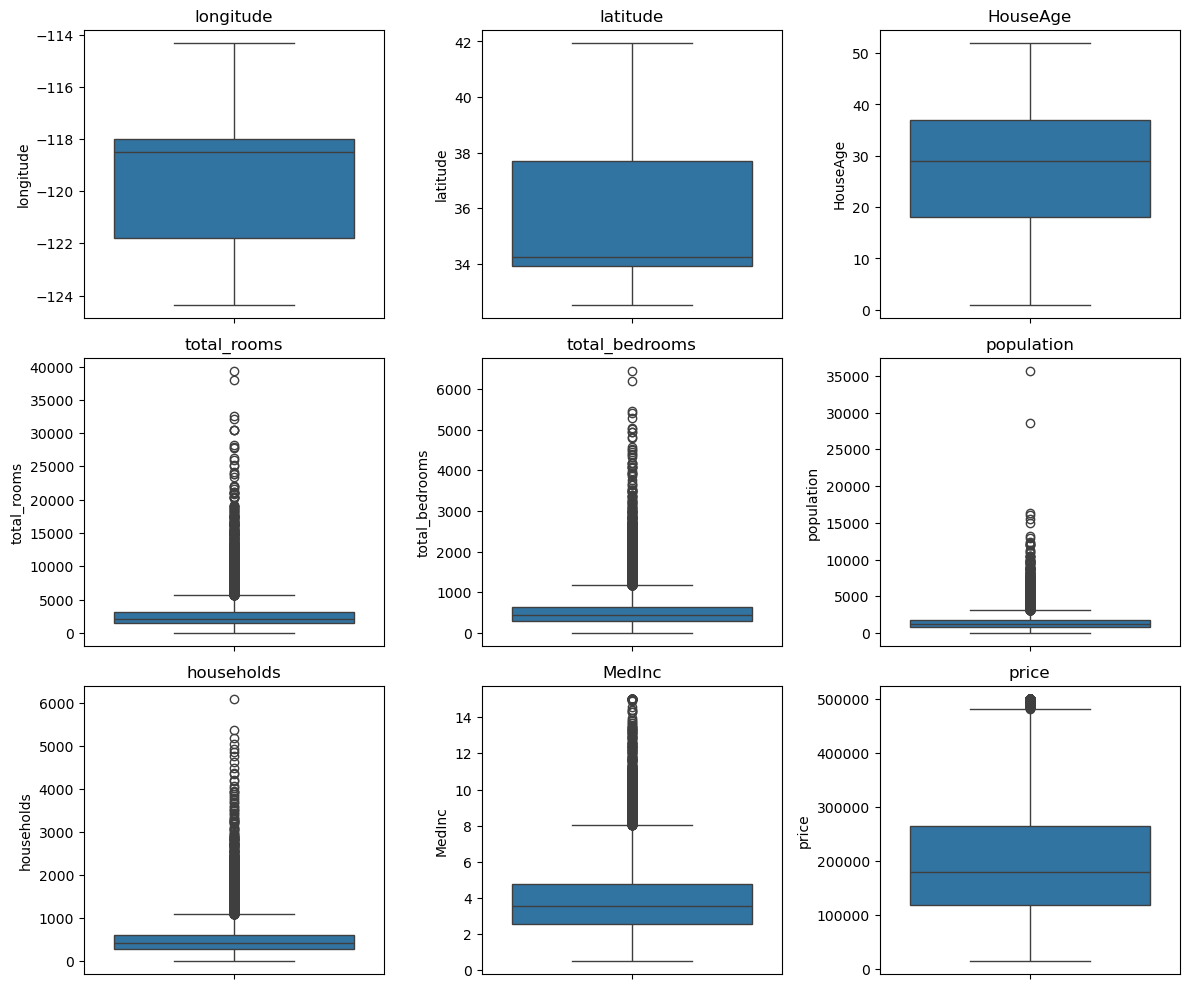

In [7]:
# Histograms of individual features
df.hist(figsize=(12,10), bins =20)
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(12,10))
for i, column in enumerate(df.columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show

## Simple Linear Regression

In [ ]:
# Define the target variable and the predictor variable
X = df[['MedInc']]  #predictor
y = df['price']  #Target

In [ ]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the model

simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = simple_model.predict(X_test)

#Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

#Plot the regression Line
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('MedInc')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [ ]:
# Assuming model has already been trained

#Input MedInc value from user
medinc_value = float(input("enter the MedInc value: "))

#Convert the Input to a 2D array for the model
medinc_array = np.array([[medinc_value]])

#Predict hte house price using the trained model
predicted_price = simple_model.predict(medinc_array)

#Output the prediction
print(f"The predicted house price for MedInc value of {medinc_value} is: ${predicted_price[0]:.2f}")


## Multiple Linear Regression

In [ ]:
#Define multiple predictors
X_multi = df[['MedInc', 'HouseAge', 'total_rooms', 'households', 'latitude', 'longitude']]
y_multi = df['price']

In [ ]:
#Split the dataset into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [ ]:
# Create and train the model

multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

In [ ]:
# Predictions
y_pred_multi = multi_model.predict(X_test_multi)

#Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test_multi, y_pred_multi)}')
print(f'R^2 Score: {r2_score(y_test_multi, y_pred_multi)}')

In [ ]:
# Display the coefficients of the model
coefficients = pd.DataFrame(multi_model.coef_, X_multi.columns, columns=['Coefficient'])
print(coefficients)

 In this notebook, we performed exploratory data analysis, built both siple and multiple 
 linear regression models, and evaluated their performance.